In [1]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# FEL
path = "../FEL"
files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]

In [4]:
data_dict = {}
pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega > 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

def return_negative_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega < 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method


# Main -------------------------------------------------
count = 1

for filename in files:
    if os.stat(filename).st_size == 0: continue
    with open(filename, "r") as fh:
        json_data = json.load(fh)
    #end with
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    #print(filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    negative_sites, negative_sites_list = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    
    # p-values
    p_values_list = []
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[4]
        p_values_list.append(p_value)
    #end for
    
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
            
    count += 1
#end for

In [5]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

,Filename,num_seqs,num_sites,negative_sites,positive_sites,positive_sites_list,negative_sites_list,p_values
1,TP53_refseq_cds_CodonAligned.fas_subsampled_11...,87,587,349,3,"[71, 73, 94]","[1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 20, 21, 22,...","[0.00110509326940389, 3.460658653109405e-05, 0..."
2,TP53_refseq_cds_CodonAligned.fas_subsampled_8....,196,633,359,3,"[86, 95, 206]","[2, 3, 6, 8, 9, 10, 11, 12, 13, 20, 21, 22, 23...","[0.162167414319616, 5.200578395980759e-05, 0.0..."
3,TP53_refseq_cds_CodonAligned.fas_subsampled_17...,78,478,311,2,"[173, 401]","[1, 2, 3, 4, 6, 9, 10, 11, 13, 14, 16, 17, 27,...","[0.0003736671245355705, 0.004205080485460644, ..."
4,TP53_refseq_cds_CodonAligned.fas_subsampled_58...,146,644,350,1,[96],"[2, 3, 4, 8, 9, 10, 11, 15, 22, 23, 24, 25, 26...","[1, 0.06108360290262937, 5.073214312534269e-06..."
5,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,64,590,337,1,[50],"[1, 2, 3, 6, 7, 11, 14, 22, 23, 24, 25, 26, 27...","[0.0313860511218268, 4.31537549505645e-06, 0.0..."
...,...,...,...,...,...,...,...,...
138,TP53_refseq_cds_CodonAligned.fas_subsampled_13...,66,584,335,2,"[67, 68]","[1, 2, 3, 7, 8, 9, 11, 14, 22, 23, 24, 25, 27,...","[0.03188447377278592, 1.020350595404285e-05, 0..."
139,TP53_refseq_cds_CodonAligned.fas_subsampled_23...,181,633,357,3,"[86, 95, 206]","[2, 3, 6, 8, 9, 10, 11, 12, 13, 20, 21, 22, 23...","[0.1682956110913001, 0.0001635819373404512, 0...."
140,TP53_refseq_cds_CodonAligned.fas_subsampled_30...,174,630,351,1,[91],"[3, 4, 8, 9, 10, 11, 15, 22, 23, 24, 25, 26, 3...","[1, 0.8349908592382838, 2.789825841231774e-06,..."
141,TP53_refseq_cds_CodonAligned.fas_subsampled_87...,117,622,347,4,"[85, 86, 87, 96]","[2, 3, 4, 8, 9, 10, 11, 15, 22, 23, 24, 25, 26...","[1, 0.02915253386938821, 5.558858862886318e-06..."


In [31]:
df = df.sort_values(by=['num_seqs'], ascending=False)
df

,Filename,num_seqs,num_sites,negative_sites,positive_sites,positive_sites_list,negative_sites_list,p_values
110,TP53_refseq_cds_CodonAligned.fas_subsampled_1....,203,650,361,2,"[66, 126]","[12, 13, 14, 16, 17, 18, 19, 24, 25, 26, 27, 2...","[0.968724044905393, 1, 1, 1, 1, 1, 1, 0.584918..."
12,TP53_refseq_cds_CodonAligned.fas_subsampled_2....,202,648,360,4,"[62, 72, 223, 241]","[12, 13, 14, 16, 17, 18, 19, 21, 24, 25, 26, 2...","[1, 1, 1, 1, 1, 1, 0.2782054494629715, 0.72962..."
45,TP53_refseq_cds_CodonAligned.fas_subsampled_3....,201,650,364,2,"[66, 126]","[12, 13, 14, 16, 17, 18, 19, 24, 25, 26, 27, 2...","[0.9686695304596649, 1, 1, 1, 1, 1, 1, 0.58141..."
9,TP53_refseq_cds_CodonAligned.fas_subsampled_4....,200,631,357,3,"[107, 206, 224]","[12, 13, 14, 16, 17, 18, 19, 24, 25, 26, 27, 2...","[1, 1, 1, 1, 1, 1, 0.2804679708164233, 0.72706..."
48,TP53_refseq_cds_CodonAligned.fas_subsampled_5....,199,631,350,1,[88],"[2, 3, 7, 8, 9, 10, 14, 21, 22, 23, 24, 25, 35...","[0.1816939216486425, 7.682811292841762e-05, 0...."
...,...,...,...,...,...,...,...,...
138,TP53_refseq_cds_CodonAligned.fas_subsampled_13...,66,584,335,2,"[67, 68]","[1, 2, 3, 7, 8, 9, 11, 14, 22, 23, 24, 25, 27,...","[0.03188447377278592, 1.020350595404285e-05, 0..."
119,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,65,591,329,1,[68],"[1, 2, 3, 7, 8, 11, 14, 22, 23, 24, 25, 27, 28...","[0.03004312554847077, 9.464697353633866e-06, 0..."
5,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,64,590,337,1,[50],"[1, 2, 3, 6, 7, 11, 14, 22, 23, 24, 25, 26, 27...","[0.0313860511218268, 4.31537549505645e-06, 0.0..."
37,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,63,581,327,2,"[50, 136]","[1, 2, 3, 6, 7, 11, 14, 22, 23, 24, 25, 27, 28...","[0.02960516856054973, 6.592903831648123e-06, 0..."


<AxesSubplot:xlabel='num_seqs', ylabel='num_sites'>

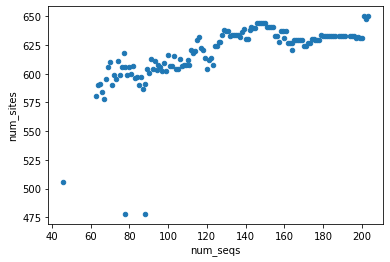

In [17]:
df.plot(x="num_seqs", y="num_sites", kind="scatter")

<AxesSubplot:>

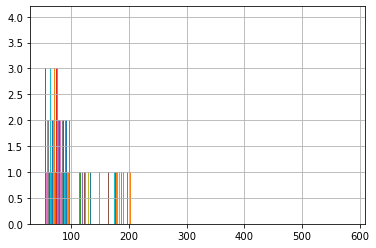

In [10]:
df["positive_sites_list"].hist()

<AxesSubplot:>

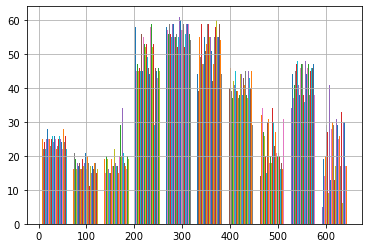

In [11]:
df["negative_sites_list"].hist()

In [18]:
import plotly.express as px
fig = px.histogram(df, x="positive_sites_list")
fig.show()

In [23]:
new_list = []
for item in df["positive_sites_list"]:
    #print(item)
    new_list.append(item)

In [27]:
import itertools
#a = [['a','b'], ['c']]
print(list(itertools.chain.from_iterable(new_list)))
x=list(itertools.chain.from_iterable(new_list))

[66, 126, 62, 72, 223, 241, 66, 126, 107, 206, 224, 88, 88, 88, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 86, 95, 206, 87, 96, 207, 90, 201, 90, 201, 90, 201, 91, 91, 91, 91, 91, 192, 91, 192, 90, 90, 90, 90, 90, 84, 86, 91, 91, 91, 95, 97, 89, 95, 95, 97, 95, 97, 95, 97, 199, 88, 90, 88, 90, 123, 101, 103, 132, 101, 103, 132, 101, 103, 132, 101, 103, 132, 96, 96, 96, 96, 96, 96, 131, 207, 96, 131, 207, 96, 131, 208, 96, 128, 205, 94, 96, 122, 94, 96, 122, 96, 102, 107, 125, 158, 89, 104, 94, 124, 95, 96, 107, 124, 155, 101, 108, 199, 101, 108, 199, 101, 108, 199, 99, 124, 98, 105, 98, 105, 99, 106, 86, 87, 88, 95, 114, 84, 85, 86, 187, 84, 85, 86, 187, 84, 86, 84, 86, 85, 87, 85, 87, 121, 89, 86, 97, 88, 95, 84, 85, 86, 95, 85, 86, 87, 96, 90, 91, 98, 125, 88, 89, 100, 119, 80, 87, 105, 79, 80, 91, 109, 81, 82, 93, 115, 190, 80, 91, 109, 75, 77, 112, 139, 75, 

In [30]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

#x = np.random.randn(500)

fig = go.Figure(data=[go.Histogram(x=x, bins=600)])
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Histogram: 'bins'

Did you mean "xbins"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        autobinx
            Obsolete: since v1.42 each bin attribute is auto-
            determined separately and `autobinx` is not needed.
            However, we accept `autobinx: true` or `false` and will
            update `xbins` accordingly before deleting `autobinx`
            from the trace.
        autobiny
            Obsolete: since v1.42 each bin attribute is auto-
            determined separately and `autobiny` is not needed.
            However, we accept `autobiny: true` or `false` and will
            update `ybins` accordingly before deleting `autobiny`
            from the trace.
        bingroup
            Set a group of histogram traces which will have
            compatible bin settings. Note that traces on the same
            subplot and with the same "orientation" under `barmode`
            "stack", "relative" and "group" are forced into the
            same bingroup, Using `bingroup`, traces under `barmode`
            "overlay" and on different axes (of the same axis type)
            can have compatible bin settings. Note that histogram
            and histogram2d* trace can share the same `bingroup`
        cumulative
            :class:`plotly.graph_objects.histogram.Cumulative`
            instance or dict with compatible properties
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        error_x
            :class:`plotly.graph_objects.histogram.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.histogram.ErrorY` instance
            or dict with compatible properties
        histfunc
            Specifies the binning function used for this histogram
            trace. If "count", the histogram values are computed by
            counting the number of values lying inside each bin. If
            "sum", "avg", "min", "max", the histogram values are
            computed using the sum, the average, the minimum or the
            maximum of the values lying inside each bin
            respectively.
        histnorm
            Specifies the type of normalization used for this
            histogram trace. If "", the span of each bar
            corresponds to the number of occurrences (i.e. the
            number of data points lying inside the bins). If
            "percent" / "probability", the span of each bar
            corresponds to the percentage / fraction of occurrences
            with respect to the total number of sample points
            (here, the sum of all bin HEIGHTS equals 100% / 1). If
            "density", the span of each bar corresponds to the
            number of occurrences in a bin divided by the size of
            the bin interval (here, the sum of all bin AREAS equals
            the total number of sample points). If *probability
            density*, the area of each bar corresponds to the
            probability that an event will fall into the
            corresponding bin (here, the sum of all bin AREAS
            equals 1).
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.histogram.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-time-format#locale_format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variable `binNumber` Anything contained
            in tag `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>". To hide the
            secondary box completely, use an empty tag
            `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            :class:`plotly.graph_objects.histogram.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        nbinsx
            Specifies the maximum number of desired bins. This
            value will be used in an algorithm that will decide the
            optimal bin size such that the histogram best
            visualizes the distribution of the data. Ignored if
            `xbins.size` is provided.
        nbinsy
            Specifies the maximum number of desired bins. This
            value will be used in an algorithm that will decide the
            optimal bin size such that the histogram best
            visualizes the distribution of the data. Ignored if
            `ybins.size` is provided.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        selected
            :class:`plotly.graph_objects.histogram.Selected`
            instance or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.histogram.Stream` instance
            or dict with compatible properties
        text
            Sets hover text elements associated with each bar. If a
            single string, the same string appears over all bars.
            If an array of string, the items are mapped in order to
            the this trace's coordinates.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.histogram.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the sample data to be binned on the x axis.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xbins
            :class:`plotly.graph_objects.histogram.XBins` instance
            or dict with compatible properties
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        y
            Sets the sample data to be binned on the y axis.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ybins
            :class:`plotly.graph_objects.histogram.YBins` instance
            or dict with compatible properties
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        
Did you mean "xbins"?

Bad property path:
bins
^^^^

In [ ]:
import plotly.express as px
import numpy as np

df = px.data.tips()
# create the bins
counts, bins = np.histogram(df.total_bill, bins=range(0, 60, 5))
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'total_bill', 'y':'count'})
fig.show()